In [1]:
#imports 
import matplotlib.pyplot as plt
from fpdf import FPDF 
import pandas as pd 
from src.functions import *

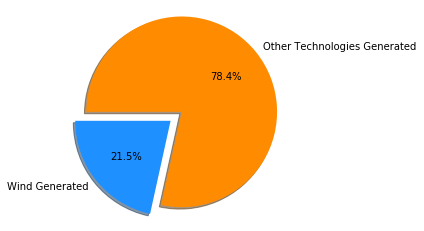

In [2]:
createPDF('02', '10', '2019')

In [ ]:
def createPDF(day, month, year):
    element = requestAemet(day, month, year)[0:2]
    dataframe = requestAemet(day, month, year)[2]
    piePlotter(element)
    pdf = FPDF('P','mm','A4')

    # Add page
    pdf.add_page()
    
    pdf.image("./output/pie.png", 10, 170, h=50)

    pdf.add_page()
    dataframe
    # Defining parameters
    num_col = len(dataframe.columns)
    w,h=190,277
    font_type = ('Arial', 'B', 12)
    pdf.set_font(*font_type)
    pdf.set_text_color(0)
    pdf.set_draw_color(0)
    pdf.set_line_width(0.2)
    for col in dataframe.columns:
        pdf.CellFit(w/num_col,10,col,1,0,'C')
    pdf.ln()
    pdf.set_fill_color(243,95,95)
    font_type = ('Arial', '', 8)
    pdf.set_font(*font_type)
    # iteration rows
    for _,row in dataframe.iterrows():
        # iterating columns
        for value in dataframe.columns:
            pdf.cell(w/num_col,10,row[value],1,0,'C',1)
        pdf.ln()
    pdf.output("./output/report.pdf",'F')

In [ ]:
def fit_word(string,cell_w,font_type):
    ver.set_font(*font_type)
    # if string fits, return it unchanged
    if ver.get_string_width(string)<cell_w:
        return string
    # cut string until it fits
    while ver.get_string_width(string)>=cell_w:
        string = string[:-1]
    # replace last 3 characters with "..."
    string = string[:-3] + "..."
    return string